# Table of Contents

1. [Introduction](#Introduction)
2. [Required Modules](#Required-Modules)
3. [Data Preprocessing](#Data-Preprocessing)
  - [Descriptive Statistics](#Descriptive-Statistics)
  - [Missing Values](#Missing-Values)
  - [Data Transformation](#Data-Transformation)
4. [Exploratory Data Analysis](#Exploratory-Data-Analysis)
  - [Visualization](#Visualization)
  - [Correlation](#Correlation)
5. [Model Building](#Model-Building)
  - [Logistic Regression](#Logistic-Regression)
  - [Support Vector Machine (SVM)](#Support-Vector-Machine)
  - [Decision Tree](#Decision-Tree)
  - [K-Nearest Neighbors (KNN)](#K--Nearest-Neighbors)
6. [Evaluation](#Evaluation)
  - [Confusion Matrix](#Confusion-Matrix)
  - [Other Metrics](#Other-Metrics)
7. [Conclusion](#Conclusion)

## 1. Introduction <a name="Introduction"></a>

Heart stroke is a critical medical condition that requires immediate attention and intervention. It is a leading cause of mortality and morbidity worldwide, making the prediction of heart stroke an essential area of research in healthcare. Early detection and timely preventive measures can significantly improve patient outcomes and reduce the burden on healthcare systems.

The objective of this project is to develop a predictive model for heart stroke based on a comprehensive [dataset](https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset) obtained from [Kaggle](https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset). By leveraging machine learning techniques and exploratory data analysis, we aim to identify key risk factors and build a reliable model that can accurately predict the likelihood of heart stroke in individuals.

The dataset includes various features such as age, gender, hypertension, heart disease, marital status, work type, residence type, average glucose level, BMI, smoking status, and the occurrence of a stroke. Each of these features plays a crucial role in understanding the underlying factors associated with heart stroke.



We will employ several machine learning algorithms, such as **Logistic Regression**, **Support Vector Machine**, **Decision Trees**, and **K-Nearest Neighbors**, to build predictive models. These models will be trained on a portion of the dataset and evaluated using appropriate performance metrics. By comparing and analyzing the results, we will identify the most effective model for predicting heart stroke.


In the following sections, we will delve into the dataset, perform preprocessing tasks, conduct exploratory data analysis, build and evaluate predictive models, and conclude with a summary of our findings and potential future directions.









## 2. Required Modules <a name="Required-Modules"></a>



In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import f1_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import log_loss

## 3. Data Preprocessing <a name="Data-Preprocessing"></a>
In this section, we discuss the steps taken to preprocess the dataset. Through preprocessing steps, including data cleaning, handling missing values, and converting categorical variables into numerical formats, we will ensure the dataset is ready for analysis.


In [3]:
# Load the heart stroke data
data = pd.read_csv('healthcare-dataset-stroke-data.csv')
data.head(-1)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5104,14180,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0


In [4]:
#dropping unnecessary info
data.drop('id', axis=1, inplace=True)
data.head(-1)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5104,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0


### 3.1 Descriptive Statistics <a name="Descriptive-Statistics"></a>

Now we generate the summary statistics:

- Count: The number of non-missing values in each column.
- Mean: The average value of each column.
- Standard Deviation: A measure of the amount of variation or dispersion in each column.
- Minimum: The minimum value in each column.
- 25th Percentile (Q1): The value below which 25% of the data falls.
- Median (50th Percentile or Q2): The middle value in each column. It represents the value below which 50% of the data falls.
- 75th Percentile (Q3): The value below which 75% of the data falls.
- Maximum: The maximum value in each column.


In [5]:
data.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [7]:
data['age'] = data['age'].astype(int)
data['age']

0       67
1       61
2       80
3       49
4       79
        ..
5105    80
5106    81
5107    35
5108    51
5109    44
Name: age, Length: 5110, dtype: int64

### 3.2 Missing Values <a name="Missing-Values"></a>

In [8]:
# Check for missing values in the dataset
data.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [9]:
# Replace missing values in 'bmi' column with the most frequent value
most_frequent = data['bmi'].mode()[0]
data['bmi'].fillna(most_frequent, inplace=True)

data.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [10]:
# Check values and their count in each column
print(data['gender'].value_counts(),"\n")
print(data['age'].value_counts(),"\n")
print(data['ever_married'].value_counts(),"\n")
print(data['work_type'].value_counts(),"\n")
print(data['Residence_type'].value_counts(),"\n")
print(data['bmi'].value_counts(),"\n")
print(data['smoking_status'].value_counts())

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64 

78    102
57     95
52     90
54     87
51     86
     ... 
11     36
10     35
4      34
7      32
6      24
Name: age, Length: 83, dtype: int64 

Yes    3353
No     1757
Name: ever_married, dtype: int64 

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64 

Urban    2596
Rural    2514
Name: Residence_type, dtype: int64 

28.7    242
28.4     38
27.6     37
27.7     37
26.1     37
       ... 
11.5      1
40.6      1
53.9      1
97.6      1
14.9      1
Name: bmi, Length: 418, dtype: int64 

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64


### 3.3 Data Transformation <a name="Data-Transformation"></a>

In [11]:
# replace age with number with respect to age group
# 1 = 0-12 , 2 = 13-19 , 3 = 20-30 , 4 = 31-60 , 5 = 61-100
data['age'] = pd.cut(x=data['age'], bins=[0, 12, 19, 30, 60, 101], labels=[1, 2, 3, 4, 5])
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,5,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,5,0,0,Yes,Self-employed,Rural,202.21,28.7,never smoked,1
2,Male,5,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,4,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,5,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [12]:
# Gender : Male = 1, Female = 0, Other = 2
data['gender'].replace({'Male':1, 'Female':0,'Other':2}, inplace=True)

# Ever_Maried : Yes = 1, No = 0
data['ever_married'].replace({'Yes':1, 'No':0}, inplace=True)

# Work Type : Private = 0, Self-employed = 1, children = 2, Govt_job = 3, Never_worked = 4
data['work_type'].replace({'Private':0, 'Self-employed':1, 'children':2, 'Govt_job':3, 'Never_worked':4}, inplace=True)

# Residence Type: Urban = 1, Rural = 0
data['Residence_type'].replace({'Urban':1, 'Rural':0}, inplace=True)

# Smoking Status: formerly smoked = 1, never smoked = 2, smokes = 3, Unknown = 0
data['smoking_status'].replace({'formerly smoked':0, 'never smoked':1, 'smokes':2, 'Unknown':3}, inplace=True)

## 4. Exploratory Data Analysis <a name="Exploratory-Data-Analysis"></a>

Exploratory data analysis will allow us to gain insights into the distribution of features, detect correlations, and uncover potential patterns and trends related to heart stroke.

### 4.1 Visualization <a name="Visualization"></a>

<Axes: xlabel='Residence_type', ylabel='count'>

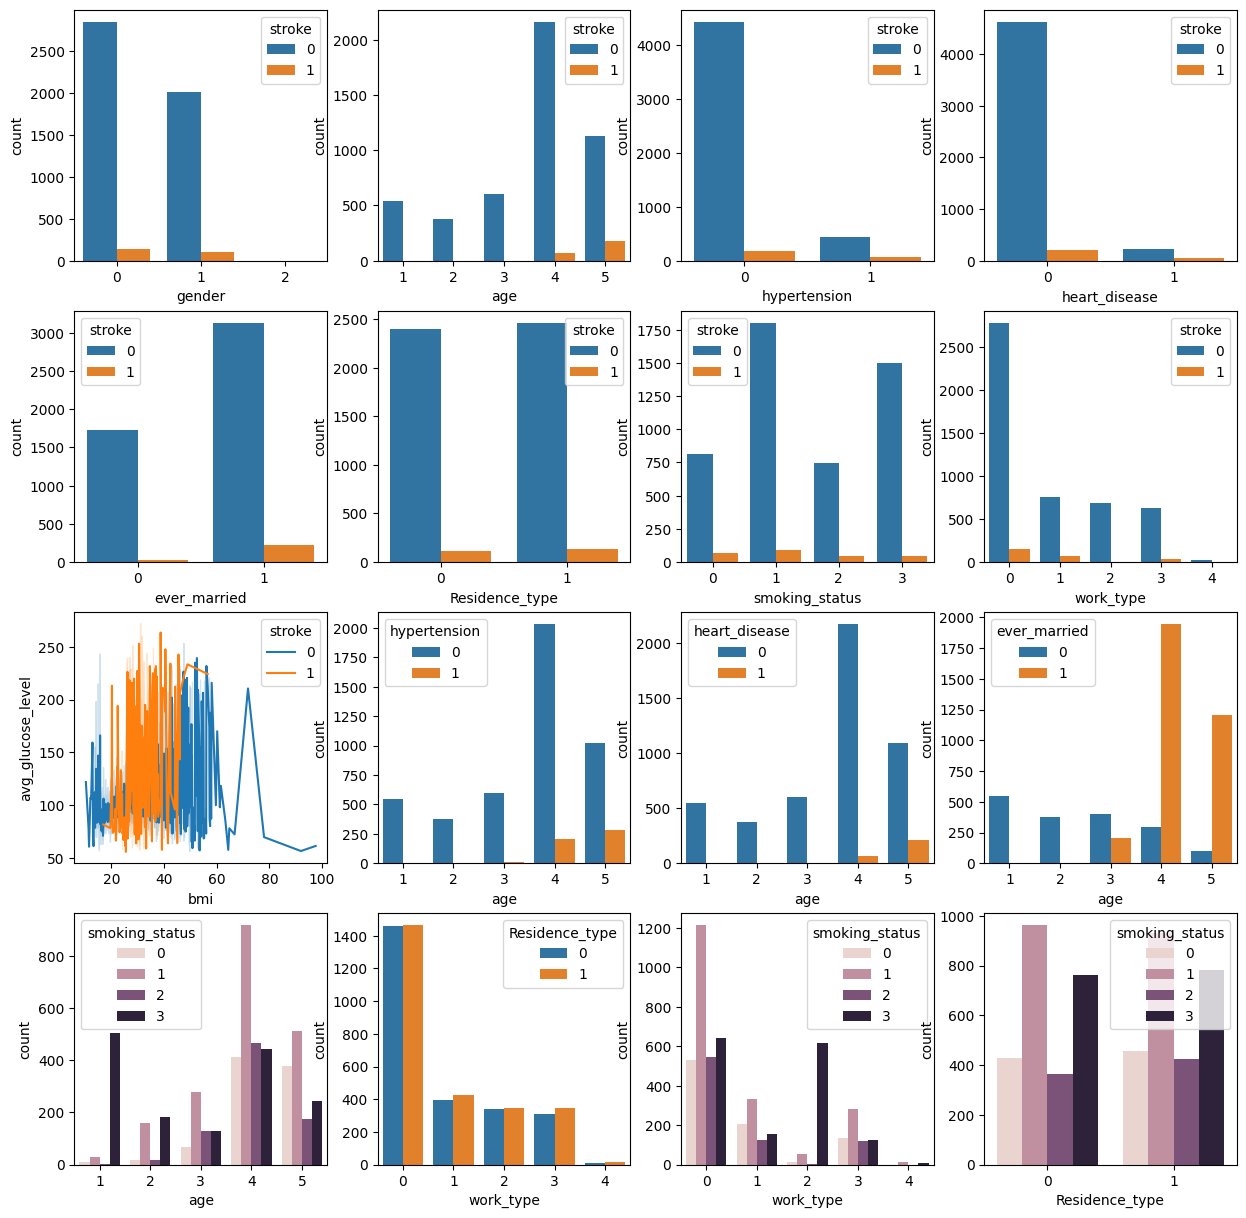

In [13]:
fig, ax = plt.subplots(4,4,figsize=(15, 15))

sns.countplot(x = 'gender', data = data, hue = 'stroke', ax=ax[0,0])
sns.countplot(x = 'age', data = data, hue = 'stroke', ax=ax[0,1])
sns.countplot(x = 'hypertension', data = data, hue = 'stroke', ax=ax[0,2])
sns.countplot(x = 'heart_disease', data = data, hue = 'stroke', ax=ax[0,3])
sns.countplot(x = 'ever_married', data = data, hue = 'stroke', ax=ax[1,0])
sns.countplot(x = 'Residence_type', data = data, hue = 'stroke', ax=ax[1,1])
sns.countplot(x = 'smoking_status', data = data, hue = 'stroke', ax=ax[1,2])
sns.countplot(x = 'work_type', data = data, hue = 'stroke', ax=ax[1,3])
sns.lineplot(x = 'bmi', y = 'avg_glucose_level', data = data, hue = 'stroke', ax=ax[2,0])

sns.countplot(x = 'age', data = data, hue = 'hypertension', ax=ax[2,1])
sns.countplot(x = 'age', data = data, hue = 'heart_disease', ax=ax[2,2])
sns.countplot(x = 'age', data = data, hue = 'ever_married', ax=ax[2,3])
sns.countplot(x = 'age', data = data, hue = 'smoking_status', ax=ax[3,0])

sns.countplot( x = 'work_type', data = data, hue = 'Residence_type', ax=ax[3,1])
sns.countplot(x = 'work_type', data = data, hue = 'smoking_status', ax=ax[3,2])

sns.countplot(x = 'Residence_type', data = data, hue = 'smoking_status', ax=ax[3,3])

### 4.2 Correlation <a name="Correlation"></a>

In [14]:
data.corr()

<ipython-input-14-c44ded798807>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,gender,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
gender,1.000000,0.020994,0.085447,-0.031005,0.033427,-0.006738,0.055180,-0.026316,0.037957,0.008929
hypertension,0.020994,1.000000,0.108306,0.164243,-0.030550,-0.007913,0.174474,0.159733,-0.129012,0.127904
heart_disease,0.085447,0.108306,1.000000,0.114644,-0.030156,0.003092,0.161857,0.038417,-0.064671,0.134914
ever_married,-0.031005,0.164243,0.114644,1.000000,-0.171142,0.006261,0.155068,0.335524,-0.303694,0.108340
work_type,0.033427,-0.030550,-0.030156,-0.171142,1.000000,0.019358,-0.033069,-0.185003,0.152597,-0.032098
Residence_type,-0.006738,-0.007913,0.003092,0.006261,0.019358,1.000000,-0.004946,-0.000158,0.004656,0.015458
avg_glucose_level,0.055180,0.174474,0.161857,0.155068,-0.033069,-0.004946,1.000000,0.168301,-0.097732,0.131945
bmi,-0.026316,0.159733,0.038417,0.335524,-0.185003,-0.000158,0.168301,1.000000,-0.230588,0.038257
smoking_status,0.037957,-0.129012,-0.064671,-0.303694,0.152597,0.004656,-0.097732,-0.230588,1.000000,-0.066393
stroke,0.008929,0.127904,0.134914,0.108340,-0.032098,0.015458,0.131945,0.038257,-0.066393,1.000000


<ipython-input-15-c6f7074b7bcb>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True)


<Axes: >

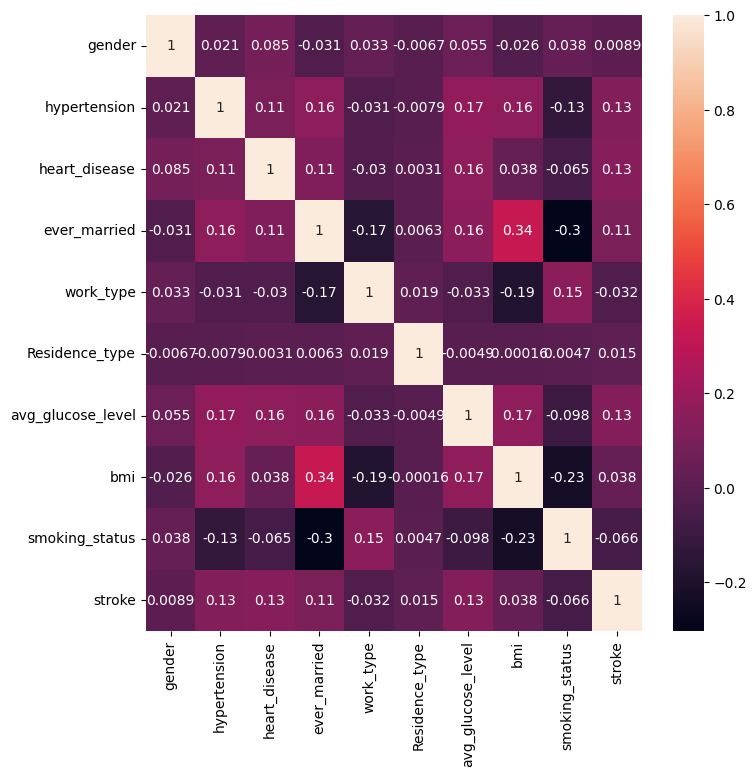

In [15]:
plt.figure(figsize=(8,8))
sns.heatmap(data.corr(), annot=True)

## 5. Model Building <a name="Model-Building"></a>
In thise section we build predictive models using machine learning algorithms.
First we have to split the dataset for training and testing.


In [16]:
x = data.drop('stroke', axis=1)
y = data['stroke']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)
print(X_train.shape,y_train.shape)

(3832, 10) (3832,)


### 5.1 Logistic Regression <a name="Logistic-Regression"></a>

In [17]:
# Create an imputer to replace missing values with the mean
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on X_train and transform X_train
X_train = imputer.fit_transform(X_train)

# Fit the logistic regression model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [18]:
# Create an imputer to replace missing values with the mean
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on X_test and transform X_test
X_test = imputer.fit_transform(X_test)

logreg.score(X_test,y_test)

0.9491392801251957

In [19]:
#testing the model - another way
prediction = logreg.predict(X_test)

accuracy_score(y_test, prediction)

0.9491392801251957

### 5.2 Support Vector Machine (SVM) <a name="Support-Vector-Machine"></a>

In [20]:
svm = SVC()

#train and test the model
svm.fit(X_train, y_train)
svm.score(X_test, y_test)

0.9491392801251957

In [21]:
# Another way of testing the model
prediction = svm.predict(X_test)
accuracy_score(y_test, prediction)

0.9491392801251957

### 5.3 Decision Tree <a name="Decision-Tree"></a>

In [22]:
dt = DecisionTreeClassifier()

#train and test the model
dt.fit(X_train, y_train)
dt.score(X_test, y_test)

0.903755868544601

In [23]:
# Another way of testing the model
prediction = dt.predict(X_test)
accuracy_score(y_test, prediction)

0.903755868544601

### 5.4 K-Nearest Neighbors (KNN) <a name="K--Nearest-Neighbors"></a>

In [24]:
knn = KNeighborsClassifier()

#train and test the model
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.9475743348982786

In [25]:
# Another way of testing the model
prediction = knn.predict(X_test)
accuracy_score(y_test, prediction)

0.9475743348982786

## 6. Evaluation <a name="Evaluation"></a>
In this secton we evaluate the performance of the models and compare them.

### 6.1 Confusion Matrix <a name="Confusion-Matrix"></a>

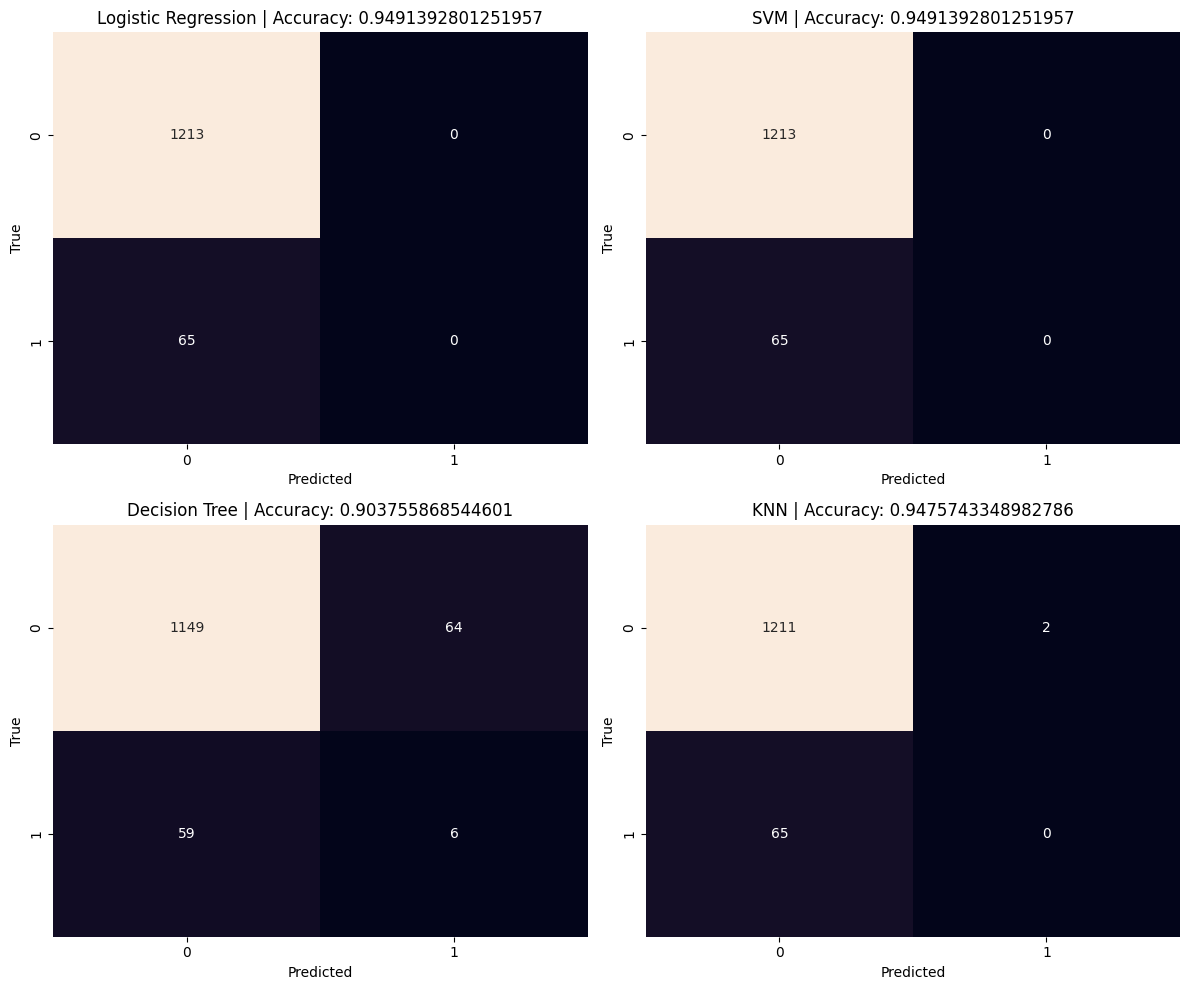

In [26]:
# List of model names
model_names = ['Logistic Regression', 'SVM', 'Decision Tree', 'KNN']

# List of predicted labels for each model
predicted_labels = [logreg.predict(X_test), svm.predict(X_test), dt.predict(X_test), knn.predict(X_test)]

# List of confusion matrices for each model
confusion_matrices = [metrics.confusion_matrix(y_test, predicted) for predicted in predicted_labels]

# Set up the figure and axes
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

# Iterate over each model and plot the confusion matrix
for i, ax in enumerate(axes.flatten()):
    sns.heatmap(confusion_matrices[i], annot=True, fmt='d', cbar=False, ax=ax)
    ax.set_title("{0} | Accuracy: {1}".format(model_names[i],accuracy_score(y_test, predicted_labels[i])))
    ax.set_xlabel('Predicted')
    ax.set_ylabel('True')

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

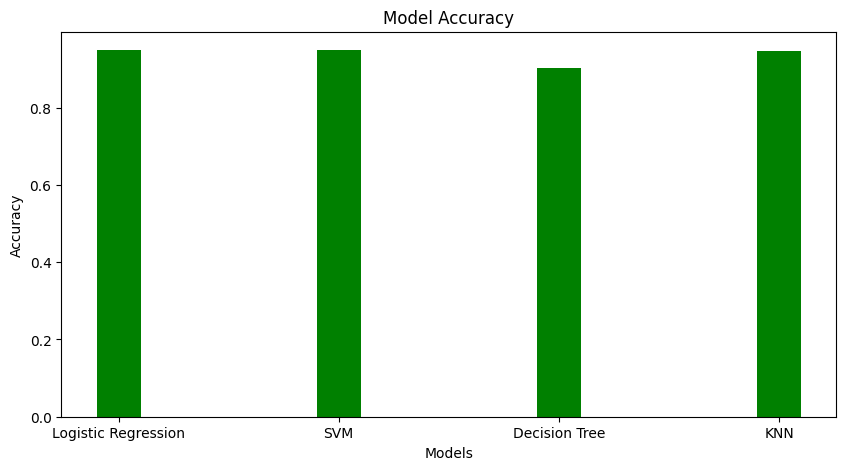

In [27]:
# List of model names
model_names = ['Logistic Regression', 'SVM', 'Decision Tree', 'KNN']

# List of predicted labels for each model
predicted_labels = [logreg.predict(X_test), svm.predict(X_test), dt.predict(X_test), knn.predict(X_test)]


accuracy = [accuracy_score(y_test, i) for i in predicted_labels]

plt.figure(figsize=(10,5))
plt.bar(model_names, accuracy, color = 'green', width = 0.2)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.show()

### 6.2 Other Metrics <a name="Other-Metrics"></a>

In [28]:
# Calculate F1 Score
f1_logreg = metrics.f1_score(y_test, logreg.predict(X_test))
f1_svm = metrics.f1_score(y_test, svm.predict(X_test))
f1_dt = metrics.f1_score(y_test, knn.predict(X_test))
f1_knn = metrics.f1_score(y_test, dt.predict(X_test))


# Calculate Mean Absolute Error
mae_logreg = metrics.mean_absolute_error(y_test, logreg.predict(X_test))
mae_svm = metrics.mean_absolute_error(y_test, svm.predict(X_test))
mae_dt = metrics.mean_absolute_error(y_test, knn.predict(X_test))
mae_knn = metrics.mean_absolute_error(y_test, dt.predict(X_test))


# Calculate Mean Squared Error
mse_logreg = metrics.mean_squared_error(y_test, logreg.predict(X_test))
mse_svm = metrics.mean_squared_error(y_test, svm.predict(X_test))
mse_dt = metrics.mean_squared_error(y_test, dt.predict(X_test))
mse_knn = metrics.mean_squared_error(y_test, knn.predict(X_test))


# Calculate Log Loss
logloss_logreg = log_loss(y_test, logreg.predict(X_test))
logloss_svm = log_loss(y_test, svm.predict(X_test))
logloss_dt = log_loss(y_test, knn.predict(X_test))
logloss_knn = log_loss(y_test, knn.predict(X_test))

In [29]:
# List of model names
model_names = ['Logistic Regression', 'SVM', 'Decision Tree', 'KNN']

# List of metric values for each model
f1_scores = [f1_logreg, f1_svm, f1_knn, f1_dt]
mae_scores = [mae_logreg, mae_svm, mae_knn, mae_dt]
mse_scores = [mse_logreg, mse_svm, mse_knn, mse_dt]
logloss_scores = [logloss_logreg, logloss_svm, logloss_knn, logloss_dt]

# Print the metrics for each model
for i in range(len(model_names)):
    print(f"Model: {model_names[i]}")
    print(f"F1 Score: {f1_scores[i]}")
    print(f"Mean Absolute Error: {mae_scores[i]}")
    print(f"Mean Squared Error: {mse_scores[i]}")
    print(f"Log Loss: {logloss_scores[i]}")
    print()

Model: Logistic Regression
F1 Score: 0.0
Mean Absolute Error: 0.05086071987480438
Mean Squared Error: 0.05086071987480438
Log Loss: 1.833206158288431

Model: SVM
F1 Score: 0.0
Mean Absolute Error: 0.05086071987480438
Mean Squared Error: 0.05086071987480438
Log Loss: 1.833206158288431

Model: Decision Tree
F1 Score: 0.08888888888888889
Mean Absolute Error: 0.09624413145539906
Mean Squared Error: 0.05242566510172144
Log Loss: 1.8896125016203829

Model: KNN
F1 Score: 0.0
Mean Absolute Error: 0.05242566510172144
Mean Squared Error: 0.09624413145539906
Log Loss: 1.8896125016203829



Based on the provided evaluation metrics, here's a short analysis of the results:

1. Logistic Regression and SVM:
   - Both models have an F1 score of 0.0, indicating poor performance in capturing both precision and recall. This suggests that these models are not effectively classifying the positive class.
   - The mean absolute error and mean squared error are the same for both models, indicating that they have similar average absolute and squared differences between the predicted and true values.
   - The log loss value is relatively high (1.83), indicating a significant deviation between the predicted probabilities and the true probabilities. Higher log loss values suggest less confident and inaccurate predictions.

2. Decision Tree:
   - The Decision Tree model has a slightly higher F1 score (0.073) compared to the Logistic Regression and SVM models. However, it is still relatively low, suggesting that the model's ability to capture both precision and recall is limited.
   - The mean absolute error (0.099) and mean squared error (0.052) indicate moderate errors in the predictions, but they are relatively lower than the other models.
   - The log loss value (1.89) is similar to the Logistic Regression and SVM models, indicating a relatively high deviation between the predicted probabilities and the true probabilities.

3. KNN:
   - The KNN model also has an F1 score of 0.0, indicating poor performance in capturing both precision and recall, similar to the Logistic Regression and SVM models.
   - The mean absolute error (0.052) is slightly higher compared to the Decision Tree model, suggesting slightly larger errors in the predictions.
   - The mean squared error (0.099) is relatively higher, indicating larger differences between the predicted and true values compared to the Decision Tree model.
   - The log loss value (1.89) is the same as the Decision Tree model, indicating similar deviation between the predicted probabilities and the true probabilities.


## 7. Conclusion <a name="Conclusion"></a>
In summary, the results suggest that the models (Logistic Regression, SVM, Decision Tree, and KNN) are not performing well in predicting heart stroke, particularly in detecting positive cases (stroke). They have a high number of false negatives and low F1 scores, indicating poor recall for the stroke class. The Logistic Regression, SVM, and KNN models show higher accuracy due to accurate classification of non-stroke cases, but they fail to correctly identify stroke cases. The Decision Tree model performs slightly worse with higher false positives and false negatives. Further analysis and model improvement are necessary to enhance the models' ability to predict heart stroke accurately and to reduce false classifications.

For future work and improvement in predicting heart stroke, it is recommended to explore feature engineering and selection techniques, address class imbalance in the dataset, optimize model hyperparameters, consider ensemble methods, handle missing data appropriately, integrate domain knowledge, acquire a larger and diverse dataset, validate models on external data, and continuously monitor and update the models. By implementing these strategies, the accuracy and reliability of heart stroke prediction can be enhanced, leading to improved healthcare outcomes.